In [1]:
import pandas as pd
import numpy as np
import os 
from glob import glob
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon



In [2]:
#store here the directory where the files of wind data are present
data_folder = '/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/custom_datasets'
# all the files in the folder
files = glob(os.path.join(data_folder + '/*.csv'))

In [131]:
def plot_turbines(X,Y):
    plt.figure(figsize = (10,8))
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
    
    
def save_df(X,Y,name):
    df = pd.DataFrame({'x':X,'y':Y})
    df.to_csv('custom_datasets/'+name + '.csv',index = False)

In [132]:
    
def checkConstraints(turb_coords, turb_diam = 100):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any. Note that this 
    function does not quantifies the amount by which the constraints 
    are violated if any. 
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine x,y coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. Prints messages.   
    """
    bound_clrnc      = 50
    prox_constr_viol = False
    peri_constr_viol = False
    
    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        turb = Point(turb)
        inside_farm   = farm_poly.contains(turb)
        correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
        if (inside_farm == False or correct_clrnc == False):
            peri_constr_viol = True
            break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    points = []
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                prox_constr_viol = True
                points.append([turb1,turb2])
                break
    
    # print messages
    if  peri_constr_viol  == True  and prox_constr_viol == True:
          print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True  and prox_constr_viol == False:
          print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
          print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return points

# Score Table

In [220]:
df = pd.read_csv(r'/home/hardik/shell.ai hackathon/resources/data_scores.csv',index_col = 0)
df.columns = ['AEP']
df

,AEP
pattern6.csv,522.600613
pattern3.csv,517.980881
pattern5.csv,517.115354
pattern4.csv,522.049370
turbine_loc_test.csv,498.153956
pattern2.csv,521.386081
pattern7.csv,524.534373
manual1.csv,523.433358
kmeans.csv,505.538857
pattern8.csv,524.627372


# the given turbine loc test file

In [133]:
data1 = pd.read_csv(files[0])
print(data1.shape)
data1.head()

(50, 2)


,x,y
0,3690.323986,370.757560
1,3259.406706,2682.588354
2,478.523823,326.121719
3,2028.458028,1131.161344
4,165.682335,1288.756179


In [134]:
X = np.array(data1)
X.shape

(50, 2)

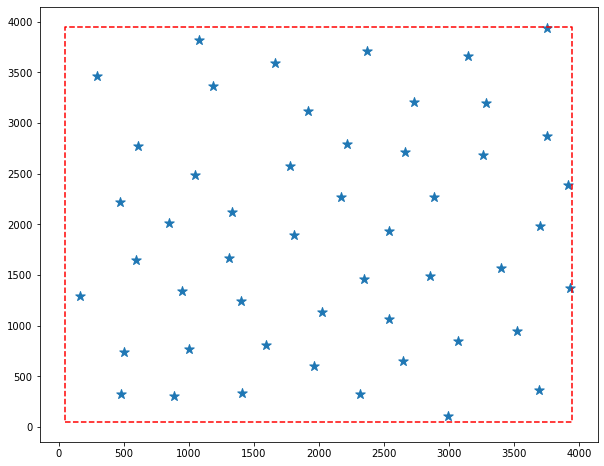

In [135]:
plot_turbines(X[:,0],X[:,1])

In [136]:
checkConstraints(X)

Both perimeter and proximity constraints are satisfied !!



[]

# Manually generating some points

In [137]:
data2 = np.array([[a,b] for a in np.linspace(51,3949, 10) for b in np.linspace(51, 3949, 5)])


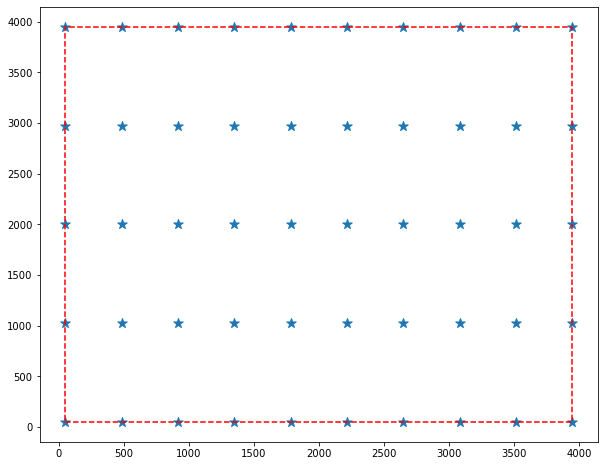

In [138]:
plot_turbines(data2[:,0],data2[:,1])

In [139]:
save_df(data2[:,0],data2[:,1],'manual1')

## Manual - 2

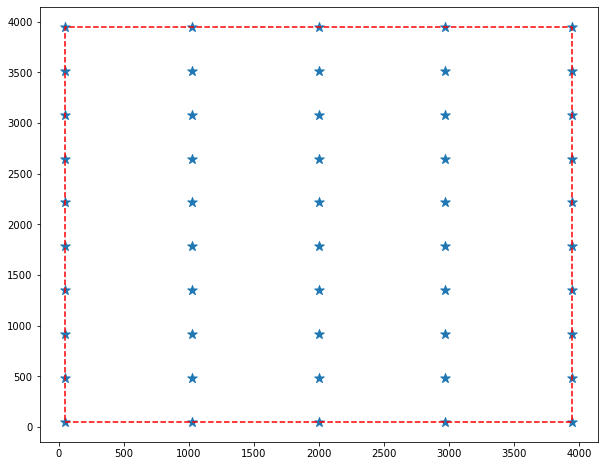

In [140]:
data2 = np.array([[a,b] for a in np.linspace(51,3949, 5) for b in np.linspace(51, 3949, 10)])


plot_turbines(data2[:,0],data2[:,1])

In [141]:
save_df(data2[:,0],data2[:,1],'manual2')

# Using K means

In [142]:
X = np.random.uniform(0,4000,(5000,2))

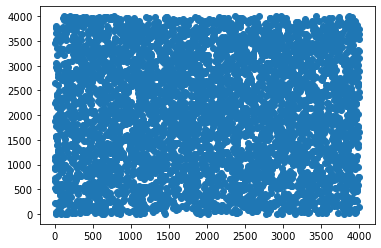

In [143]:
plt.scatter(X[:,0],X[:,1])

In [144]:
clustering = KMeans(n_clusters = 50,n_init=50)
clustering.fit(X)

KMeans(n_clusters=50, n_init=50)

In [145]:
points = clustering.cluster_centers_

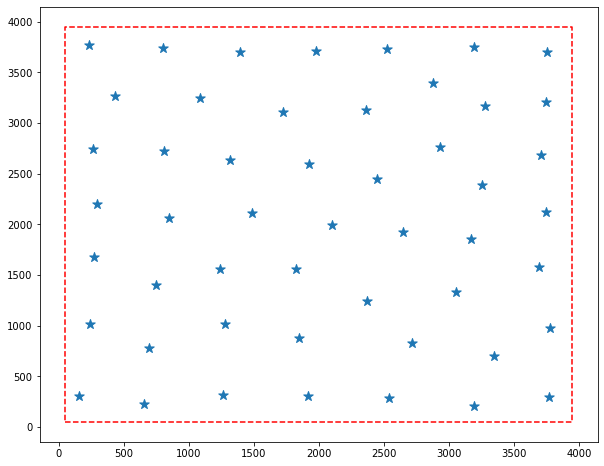

In [146]:
plot_turbines(points[:,0],points[:,1])

In [147]:
save_df(points[:,0],points[:,1],'kmeans')

In [148]:
points.shape

(50, 2)

# Random Values

In [150]:
X = np.random.uniform(50,3950,(50,2))
# checkConstraints(X)

# Algorithm

In [151]:
# import random

# radius = 400
# rangeX = (50, 3950)
# rangeY = (50,3950)
# qty = 50  # or however many points you want

# # Generate a set of all points within 200 of the origin, to be used as offsets later
# # There's probably a more efficient way to do this.
# deltas = set()
# for x in range(-radius, radius+1):
#     for y in range(-radius, radius+1):
#         if x*x + y*y <= radius*radius:
#             deltas.add((x,y))

# randPoints = []
# excluded = set()
# i = 0
# while i<qty:
#     x = random.randrange(*rangeX)
#     y = random.randrange(*rangeY)
#     if (x,y) in excluded: continue
#     randPoints.append((x,y))
#     i += 1
#     excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
# print randPoints

# Other patterns

(50, 2)


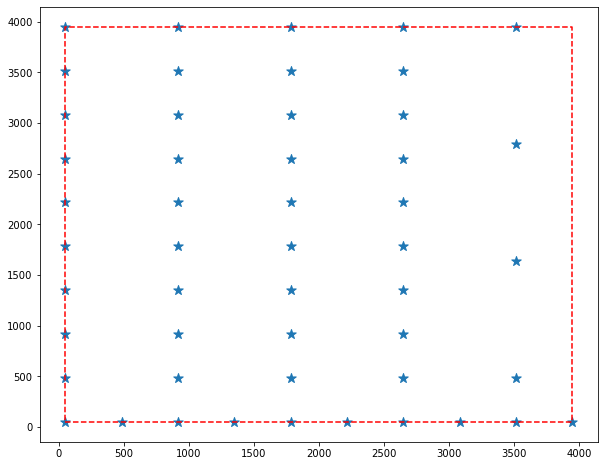

In [152]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,9)])
data6 = np.array([[3515.88875,i] for i in np.linspace(484.11111,3949,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [153]:
save_df(data[:,0],data[:,1],'pattern1')

# Pattern 2

(50, 2)


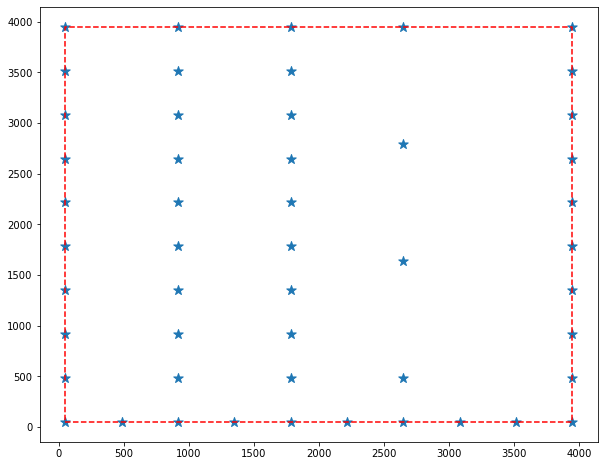

In [154]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,4)])
data6 = np.array([[3949,i] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [155]:
save_df(data[:,0],data[:,1],'pattern2')

# Pattern 3

(50, 2)


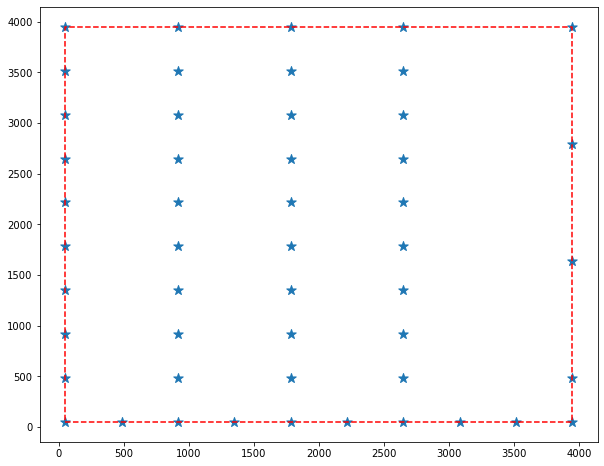

In [156]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[917.22125,i] for i in np.linspace(484.11111,3949,9)])
data4 = np.array([[1783.44375,i] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[2649.66625,i] for i in np.linspace(484.11111,3949,9)])
data6 = np.array([[3949,i] for i in np.linspace(484.11111,3949,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [157]:
save_df(data[:,0],data[:,1],'pattern3')

# Pattern 4

(50, 2)


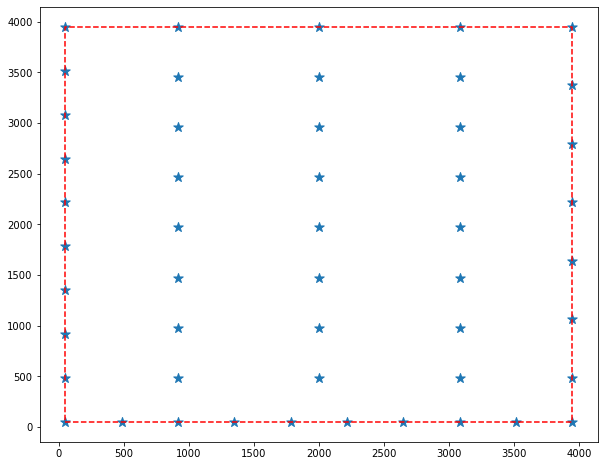

In [158]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11,3949,9)])
data3 = np.array([[a,b] for a in np.linspace(917.22125,3082.7775,3) for b in np.linspace(484.11,3949,8)])
data4 = np.array([[3949,i] for i in np.linspace(484.11,3949,7)])
data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [159]:
save_df(data[:,0],data[:,1],'pattern4')

In [160]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

In [161]:
data.shape

(50, 2)

# Pattern 5

(50, 2)


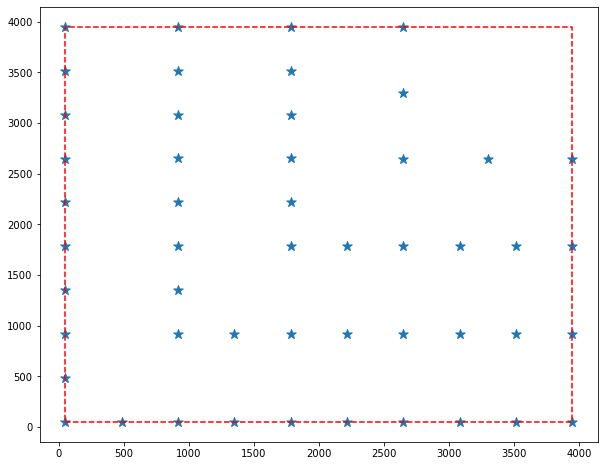

In [162]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[917.22222222,i] for i in np.linspace(917.22222222,3950,8)])
data4 = np.array([[i,917.22222222] for i in np.linspace(917.22222222,3950,8)[1:]])
data5 = np.array([[1783.44444444,i] for i in np.linspace(1783.44444444,3950,6)])
data6 = np.array([[i,1783.44444444] for i in np.linspace(1783.44444444,3950,6)[1:]])
data7 = np.array([[2649.66666663,i] for i in np.linspace(2649.66666663,3950,3)])
data8 = np.array([[i,2649.66666663] for i in np.linspace(2649.66666663,3950,3)[1:]])
data = np.concatenate([data1,data2,data3,data4,data5,data6,data7,data8]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [163]:
save_df(data[:,0],data[:,1],'pattern5')

# Pattern 6

(36, 2)


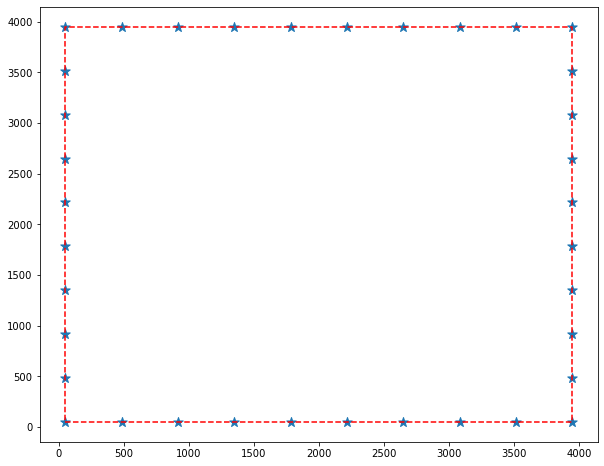

In [194]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

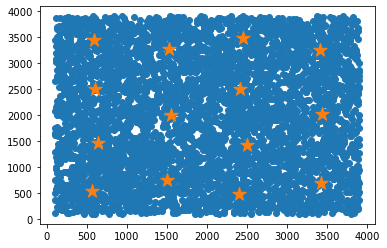

In [195]:
X = np.random.uniform(100,3900,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


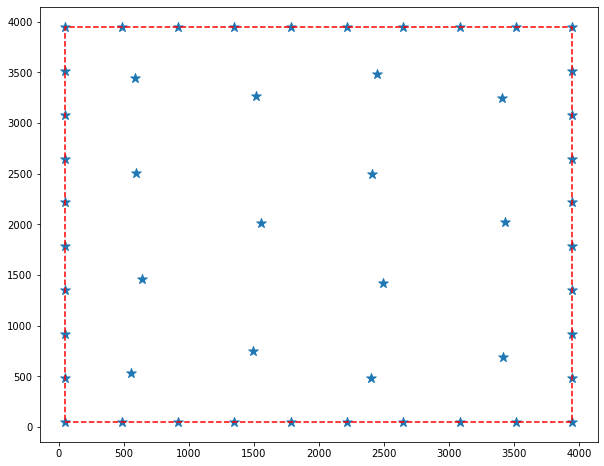

In [196]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [197]:
save_df(data[:,0],data[:,1],'pattern6')

# Pattern 7

(36, 2)


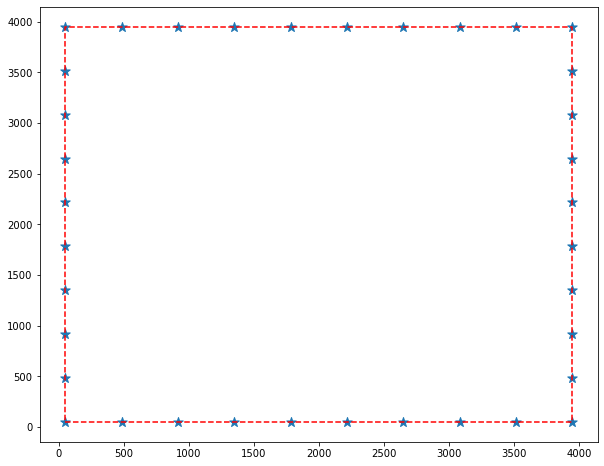

In [198]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])

data = np.concatenate([data1,data2,data3,data4]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

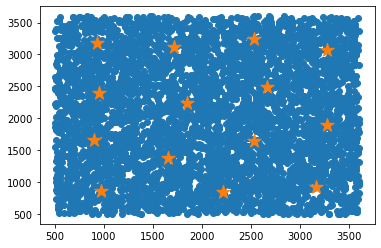

In [199]:
X = np.random.uniform(500,3600,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


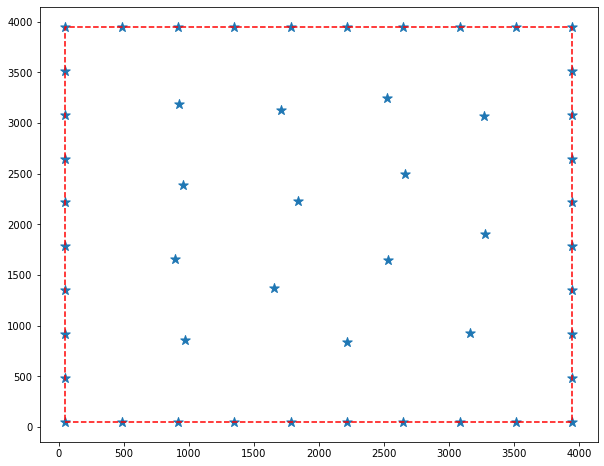

In [200]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [201]:
save_df(data[:,0],data[:,1],'pattern7')

In [202]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 8

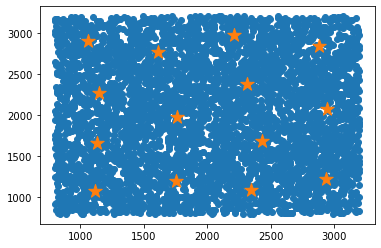

In [216]:
X = np.random.uniform(800,3200,(5000,2))

plt.scatter(X[:,0],X[:,1])

clustering = KMeans(n_clusters = 14,n_init=50)
clustering.fit(X)


points = clustering.cluster_centers_
plt.scatter(points[:,0],points[:,1],marker = '*',s = 200)

(50, 2)


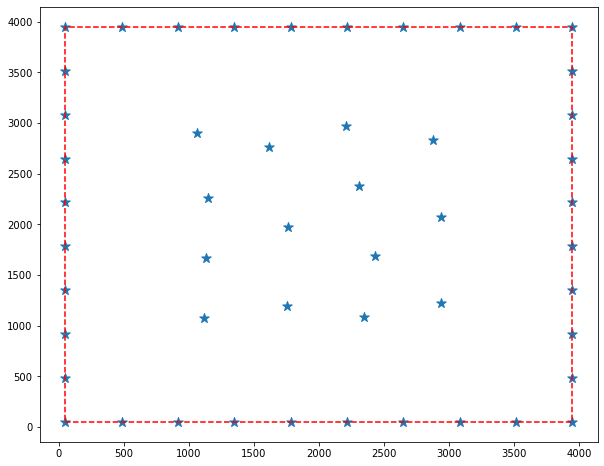

In [217]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = points
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [218]:
save_df(data[:,0],data[:,1],'pattern8')

In [219]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]